In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mountains_vs_beaches_preferences.csv")

In [3]:
df.shape

(52444, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [6]:
df['Preference'].value_counts(normalize=True)

Preference
0    0.749294
1    0.250706
Name: proportion, dtype: float64

In [5]:
df['Education_Level'].unique()

array(['bachelor', 'master', 'high school', 'doctorate'], dtype=object)

In [8]:
label_map = {'Education_Level':{'bachelor':1, 'master':2, 
                                'high school':0, 'doctorate':3}}
df = df.replace(label_map)

C:\Users\admin\AppData\Local\Temp\ipykernel_7944\1302346121.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(label_map)


In [9]:
df_ohe = pd.get_dummies(df)

In [10]:
df_ohe.shape

(52444, 24)

In [7]:
df.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [13]:
X = df_ohe.drop('Preference',axis=1)
Y = df_ohe['Preference']

In [14]:
X_sc = (X - X.mean())/X.std()

In [15]:
X_sc.mean()

Age                                1.212600e-17
Income                            -4.396520e-17
Education_Level                    7.153660e-17
Travel_Frequency                  -1.395506e-16
Vacation_Budget                    6.963980e-17
Proximity_to_Mountains            -9.131756e-17
Proximity_to_Beaches               2.289713e-17
Pets                              -6.123967e-17
Environmental_Concerns            -1.409054e-17
Gender_female                     -2.013661e-17
Gender_male                       -4.416843e-17
Gender_non-binary                  5.995255e-17
Preferred_Activities_hiking        2.113581e-17
Preferred_Activities_skiing        4.606524e-18
Preferred_Activities_sunbathing    3.251664e-18
Preferred_Activities_swimming      1.097437e-16
Location_rural                    -1.083888e-18
Location_suburban                  7.018174e-17
Location_urban                    -4.525232e-17
Favorite_Season_fall               8.318840e-17
Favorite_Season_spring            -4.416

# Strategy

- basic preprocessing
- standardize the data
- 1 data which having original imbalance
- 2 data balanced with SMOTE
- 3 data balanced with SMOTENC
- 4 data balanced with SMOTE Tomek
- 5 data with undersampling


# 1 Original data train test split

In [16]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_sc , Y , test_size=0.3,
                                                 random_state=7,stratify = Y)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((36710, 23), (15734, 23), (36710,), (15734,))

# 2 data balanced with SMOTE

In [17]:

from imblearn.over_sampling import SMOTE

In [18]:
sm = SMOTE(random_state=7)
X_sm, Y_sm = sm.fit_resample(X_sc, Y)
X_sm.shape, Y_sm.shape

((78592, 23), (78592,))

In [19]:
Y_sm.value_counts(normalize=True)

Preference
1    0.5
0    0.5
Name: proportion, dtype: float64

In [21]:
X_train_sm,X_test_sm,Y_train_sm,Y_test_sm = train_test_split(X_sm , Y_sm , test_size=0.3,
                                                 random_state=7,stratify = Y_sm)
X_train_sm.shape,X_test_sm.shape,Y_train_sm.shape,Y_test_sm.shape

((55014, 23), (23578, 23), (55014,), (23578,))

# 3 data balanced with SMOTENC

In [22]:
from imblearn.over_sampling import SMOTENC

In [25]:
X_sc.columns

Index(['Age', 'Income', 'Education_Level', 'Travel_Frequency',
       'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches',
       'Pets', 'Environmental_Concerns', 'Gender_female', 'Gender_male',
       'Gender_non-binary', 'Preferred_Activities_hiking',
       'Preferred_Activities_skiing', 'Preferred_Activities_sunbathing',
       'Preferred_Activities_swimming', 'Location_rural', 'Location_suburban',
       'Location_urban', 'Favorite_Season_fall', 'Favorite_Season_spring',
       'Favorite_Season_summer', 'Favorite_Season_winter'],
      dtype='object')

In [26]:
cat_features = ['Education_Level',
'Gender_female','Gender_male','Gender_non-binary',
'Preferred_Activities_hiking','Preferred_Activities_skiing',
'Preferred_Activities_sunbathing','Preferred_Activities_swimming',
'Location_rural','Location_suburban','Location_urban',
'Favorite_Season_fall','Favorite_Season_spring',
'Favorite_Season_summer','Favorite_Season_winter']
smc = SMOTENC(cat_features, random_state=7)
X_smc, Y_smc = smc.fit_resample(X_sc,Y)
X_smc.shape, Y_smc.shape

((78592, 23), (78592,))

In [27]:
Y_smc.value_counts(normalize=True)

Preference
1    0.5
0    0.5
Name: proportion, dtype: float64

In [28]:
X_train_smc,X_test_smc,Y_train_smc,Y_test_smc = train_test_split(X_smc , Y_smc , test_size=0.3,
                                                 random_state=7,stratify = Y_smc)
X_train_smc.shape,X_test_smc.shape,Y_train_smc.shape,Y_test_smc.shape

((55014, 23), (23578, 23), (55014,), (23578,))

# 4 data balanced with SMOTE Tomek

In [29]:
from imblearn.combine import SMOTETomek

In [30]:
smt = SMOTETomek(random_state=7)
X_smt, Y_smt = smt.fit_resample(X_sc,Y)
X_smt.shape, Y_smt.shape

((78358, 23), (78358,))

In [31]:
Y_smt.value_counts(normalize=True)

Preference
1    0.5
0    0.5
Name: proportion, dtype: float64

In [32]:
X_train_smt,X_test_smt,Y_train_smt,Y_test_smt = train_test_split(X_smt , Y_smt , test_size=0.3,
                                                 random_state=7,stratify = Y_smt)
X_train_smt.shape,X_test_smt.shape,Y_train_smt.shape,Y_test_smt.shape

((54850, 23), (23508, 23), (54850,), (23508,))

# 5 data with undersampling

In [33]:
Y.value_counts()

Preference
0    39296
1    13148
Name: count, dtype: int64

In [35]:
X_un_0 = X_sc.loc[Y==0,:].sample(Y[Y==1].count())
Y_un_0 = Y[X_un_0.index]
X_un_1 = X_sc.loc[Y==1,:]
Y_un_1 = Y[X_un_1.index]

In [37]:
X_un = pd.concat([X_un_0,X_un_1])
Y_un = pd.concat([Y_un_0,Y_un_1])
X_un.shape, Y_un.shape

((26296, 23), (26296,))

In [38]:
X_train_un,X_test_un,Y_train_un,Y_test_un = train_test_split(X_un , Y_un , test_size=0.3,
                                                 random_state=7,stratify = Y_un)
X_train_un.shape,X_test_un.shape,Y_train_un.shape,Y_test_un.shape

((18407, 23), (7889, 23), (18407,), (7889,))

# Apply Machine learning models

- logistic regression
- random forest
- catboost
- lightGBM

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier
# from lightGBM import LGBMClassifier

In [44]:
lr = LogisticRegression(random_state=7,class_weight='balanced')
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11789
           1       0.97      1.00      0.98      3945

    accuracy                           0.99     15734
   macro avg       0.98      0.99      0.99     15734
weighted avg       0.99      0.99      0.99     15734



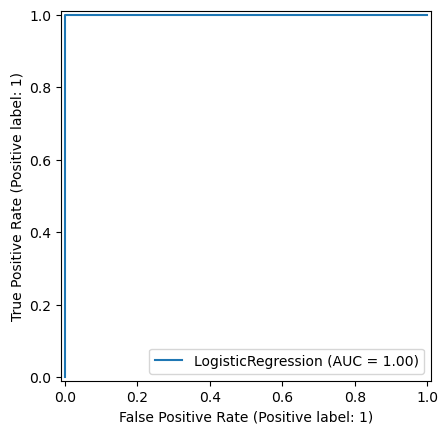

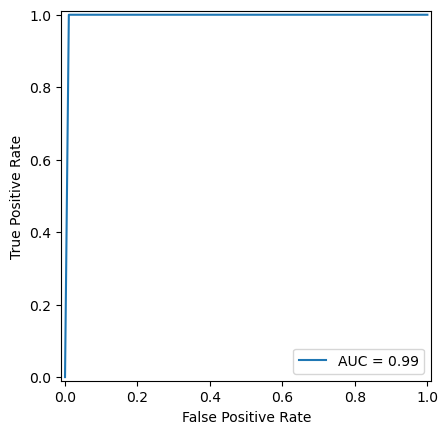

In [51]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr,X_test,Y_test)

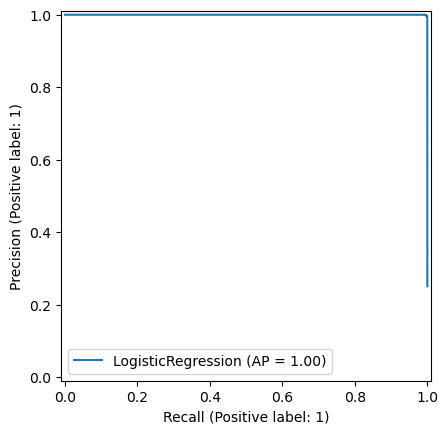

In [55]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(lr, X_test, Y_test)

In [ ]:
X_train.columns